In [38]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as animation

In [39]:
w_0 = 1 # Frecuencia natural x>0
W_0 = 5 # Frecuencia natural x<0
amort = 0 # constante de amortiguamiento
f_0 = 0 # Amplitud de la fuerza por unidad de masa
m = 1 # masa del oscilador
N = 10 # Numero de fonones

In [137]:
dt = 0.05 # Paso de tiempo
tf = 5 # Tiempo de medida (se asume que t0 = 0)
tvec = np.linspace(0,tf,int(tf/dt)+1) # Vector de instantes de tiempo

In [41]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

In [133]:
psi0 = (fock(N,2) + fock(N,1) + fock(N,3) + 3*fock(N,6)+ 2*fock(N,8)).unit()

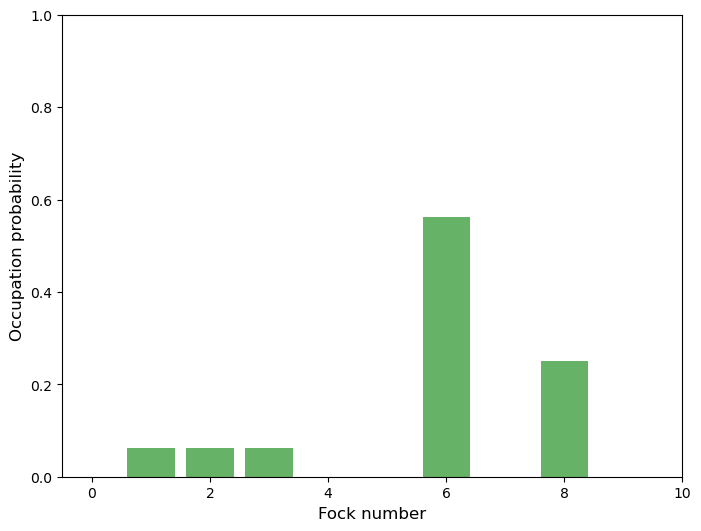

In [134]:
dm = ket2dm(psi0)
plot_fock_distribution(dm)
plt.show()

In [108]:
#x_0 = dag(psi0)*position(N)*psi0
#p_0 = dag(psi0)*momentum(N)*psi0
dx = 0.01
#xvec = np.linspace(-np.abs(x_0[0,0]),np.abs(x_0[0,0]),int(2*np.abs(x_0[0,0])/dx)+1) # Vector de posiciones
xvec = np.linspace(-5,5,500)

In [45]:
x_esp = []
p_esp = []
U_esp = []
results = []

U = 0.5*W(np.real(x_0[0,0]))*position(N)**2
H = W(np.real(x_0[0,0]))*(num(N)+0.5)

x_esp.append(np.real(x_0[0,0]))
p_esp.append(np.real(p_0[0,0]))
U_esp.append(expect(U,psi0))

for i in range(1,np.size(tvec)):
    
    result = sesolve(H, psi0, [tvec[i-1],tvec[i]], [position(N),momentum(N),U])
    result2 = sesolve(H, psi0, [tvec[i-1],tvec[i]], [])
    
    x_esp.append(result.expect[0][1])
    p_esp.append(result.expect[1][1])
    U_esp.append(result.expect[2][1])
    results.append(result2.states[1])
    psi0 = result2.states[1]
    x_0 = dag(psi0)*position(N)*psi0
    U = 0.5*W(np.real(x_0[0,0]))*position(N)**2
    H = W(np.real(x_0[0,0]))*(num(N)+0.5)

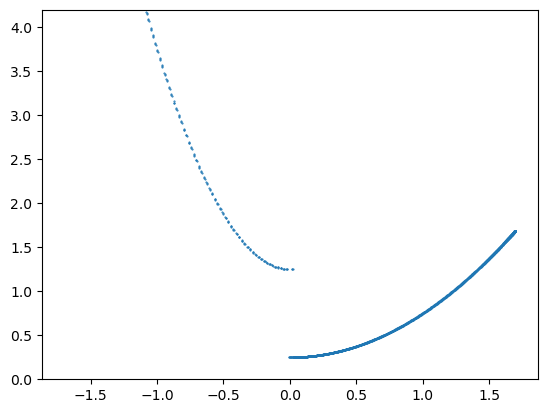

In [46]:
plt.plot(x_esp,U_esp,'.',markersize = '1')
plt.xlabel('')
plt.ylabel('')
plt.ylim([0,4.2])
#plt.xlim([-0.45,0.1])
plt.show()

In [138]:
Wigner = []
H0 = w_0*(num(N)+0.5)
res = sesolve(H0, psi0, tvec, [])
for i in range(np.size(tvec)):   
    Wigner.append(wigner(res.states[i], xvec, xvec))

In [106]:
def update_Wigner(num,Wigner):
    plt.cla()
    wmap = wigner_cmap(Wigner[num])
    plt.contourf(xvec, xvec, Wigner[num], 100, cmap=wmap)
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.title('Evolución de la función de Wigner (t = '+str(format(tvec[num],'.3f'))+' s)')
    plt.xlabel('x')
    plt.ylabel('p')

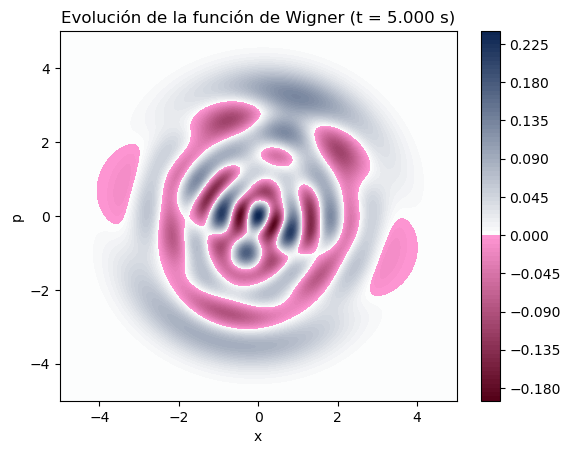

In [139]:
imW = plt.figure()
wmap = wigner_cmap(Wigner[0])
figW = plt.contourf(xvec, xvec, Wigner[0], 100, cmap=wmap)
plt.colorbar()
animP = animation.FuncAnimation(imW, update_Wigner, int(np.size(tvec)), fargs = (Wigner, ), interval = 100)
animP.save('W.gif')